In [9]:
import pandas as pd
import warnings
import re
from nltk.stem import WordNetLemmatizer, PorterStemmer, SnowballStemmer
warnings.filterwarnings('ignore')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.util import ngrams, bigrams, trigrams


In [25]:
df=pd.read_csv('tweets11.csv')

In [26]:
df.head()

,Unnamed: 0,id,Time,Tweet,Location,split,tags,split_tweets
0,0,312322346,2022-11-08 10:14:36+00:00,"b""Let's be honest; day two of a phase 1 cancer...",London,"['b""Let\'s', 'be', 'honest;', 'day', 'two', 'o...","[cancer, thyroidcancer, thyroid]","['b""Let\'s', 'be', 'honest;', 'day', 'two', 'o..."
1,1,42296887,2022-11-08 10:15:07+00:00,b'Pembrolizumab: English Drugs Body Recommends...,Florida,"[""b'Pembrolizumab:"", 'English', 'Drugs', 'Body...",[],"[""b'Pembrolizumab:"", 'English', 'Drugs', 'Body..."
2,2,1356818881063473157,2022-11-08 10:15:05+00:00,"b""RT @nettybgoode: Well, @ServicesGovAU are at...",NaN,"['b""RT', '@nettybgoode:', 'Well,', '@ServicesG...",[],"['b""RT', '@nettybgoode:', 'Well,', '@ServicesG..."
3,3,1570261324554293249,2022-11-08 10:15:04+00:00,b'@AlHosnApp where we can take session flu vac...,NaN,"[""b'@AlHosnApp"", 'where', 'we', 'can', 'take',...",[],"[""b'@AlHosnApp"", 'where', 'we', 'can', 'take',..."
4,4,4836684705,2022-11-08 10:15:03+00:00,"b""RT @DFisman: Again, your immune system didn'...","Scotland, United Kingdom","['b""RT', '@DFisman:', 'Again,', 'your', 'immun...",[],"['b""RT', '@DFisman:', 'Again,', 'your', 'immun..."


In [27]:
stop_words_file = 'SmartStoplist.txt'

stop_words = []

with open(stop_words_file, "r") as f:
    for line in f:
        stop_words.extend(line.split()) 
        
stop_words = stop_words

In [28]:
def preprocess(raw_text):
    
    #regular expression keeping only letters 
    letters_only_text = re.sub("[^a-zA-Z]", " ", raw_text)

    # convert to lower case and split into words -> convert string into list ( 'hello world' -> ['hello', 'world'])
    words = letters_only_text.lower().split()

    cleaned_words = []
    lemmatizer = PorterStemmer() #plug in here any other stemmer or lemmatiser you want to try out
    
    # remove stopwords
    for word in words:
        if word not in stop_words:
            cleaned_words.append(word)
    
    # stemm or lemmatise words
    stemmed_words = []
    for word in cleaned_words:
        word = lemmatizer.stem(word)   #dont forget to change stem to lemmatize if you are using a lemmatizer
        stemmed_words.append(word)
    
    # converting list back to string
    return " ".join(stemmed_words)

In [29]:
df['prep'] = df['Tweet'].apply(preprocess)  


In [30]:
df.head()

,Unnamed: 0,id,Time,Tweet,Location,split,tags,split_tweets,prep
0,0,312322346,2022-11-08 10:14:36+00:00,"b""Let's be honest; day two of a phase 1 cancer...",London,"['b""Let\'s', 'be', 'honest;', 'day', 'two', 'o...","[cancer, thyroidcancer, thyroid]","['b""Let\'s', 'be', 'honest;', 'day', 'two', 'o...",honest day phase cancer trial look good cancer...
1,1,42296887,2022-11-08 10:15:07+00:00,b'Pembrolizumab: English Drugs Body Recommends...,Florida,"[""b'Pembrolizumab:"", 'English', 'Drugs', 'Body...",[],"[""b'Pembrolizumab:"", 'English', 'Drugs', 'Body...",pembrolizumab english drug bodi recommend life...
2,2,1356818881063473157,2022-11-08 10:15:05+00:00,"b""RT @nettybgoode: Well, @ServicesGovAU are at...",NaN,"['b""RT', '@nettybgoode:', 'Well,', '@ServicesG...",[],"['b""RT', '@nettybgoode:', 'Well,', '@ServicesG...",rt nettybgood servicesgovau day mum finish rad...
3,3,1570261324554293249,2022-11-08 10:15:04+00:00,b'@AlHosnApp where we can take session flu vac...,NaN,"[""b'@AlHosnApp"", 'where', 'we', 'can', 'take',...",[],"[""b'@AlHosnApp"", 'where', 'we', 'can', 'take',...",alhosnapp session flu vaccin guid
4,4,4836684705,2022-11-08 10:15:03+00:00,"b""RT @DFisman: Again, your immune system didn'...","Scotland, United Kingdom","['b""RT', '@DFisman:', 'Again,', 'your', 'immun...",[],"['b""RT', '@DFisman:', 'Again,', 'your', 'immun...",rt dfisman immun system didn flabbi flu season...


In [31]:
df.drop(['Unnamed: 0'],axis=1, inplace=True)

In [32]:
df.columns

Index(['id', 'Time', 'Tweet', 'Location', 'split', 'tags', 'split_tweets',
       'prep'],
      dtype='object')

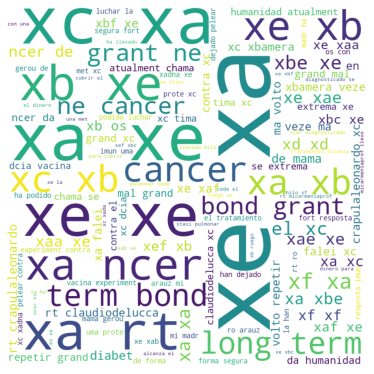

In [33]:
#nice library to produce wordclouds
from wordcloud import WordCloud

import matplotlib.pyplot as plt
# if uising a Jupyter notebook, include:
%matplotlib inline

all_words = '' 

#looping through all incidents and joining them to one text, to extract most common words
for arg in df["prep"]: 

    tokens = arg.split()  
      
    all_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 700, height = 700, 
                background_color ='white', 
                min_font_size = 10).generate(all_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (5, 5), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [34]:
df['split_tweets'] = df['prep'].str.split(' ')

In [36]:
df.head()

,id,Time,Tweet,Location,split,tags,split_tweets,prep
0,312322346,2022-11-08 10:14:36+00:00,"b""Let's be honest; day two of a phase 1 cancer...",London,"['b""Let\'s', 'be', 'honest;', 'day', 'two', 'o...","[cancer, thyroidcancer, thyroid]","[honest, day, phase, cancer, trial, look, good...",honest day phase cancer trial look good cancer...
1,42296887,2022-11-08 10:15:07+00:00,b'Pembrolizumab: English Drugs Body Recommends...,Florida,"[""b'Pembrolizumab:"", 'English', 'Drugs', 'Body...",[],"[pembrolizumab, english, drug, bodi, recommend...",pembrolizumab english drug bodi recommend life...
2,1356818881063473157,2022-11-08 10:15:05+00:00,"b""RT @nettybgoode: Well, @ServicesGovAU are at...",NaN,"['b""RT', '@nettybgoode:', 'Well,', '@ServicesG...",[],"[rt, nettybgood, servicesgovau, day, mum, fini...",rt nettybgood servicesgovau day mum finish rad...
3,1570261324554293249,2022-11-08 10:15:04+00:00,b'@AlHosnApp where we can take session flu vac...,NaN,"[""b'@AlHosnApp"", 'where', 'we', 'can', 'take',...",[],"[alhosnapp, session, flu, vaccin, guid]",alhosnapp session flu vaccin guid
4,4836684705,2022-11-08 10:15:03+00:00,"b""RT @DFisman: Again, your immune system didn'...","Scotland, United Kingdom","['b""RT', '@DFisman:', 'Again,', 'your', 'immun...",[],"[rt, dfisman, immun, system, didn, flabbi, flu...",rt dfisman immun system didn flabbi flu season...


In [2]:
df1.to_csv('prepdata2.csv')

NameError: name 'df1' is not defined